In [1]:
import pandas as pd 
import numpy as np 
np.set_printoptions(suppress=True) #for printing 
#Note - change this to DATA.csv
file = pd.read_csv('dublinbikes_20191001_20200101.csv')
print("File read.")

File read.


In [2]:
import swifter
# City bike usage for pandemic period if the pandemic DID NOT happen -----------------------
#Drop irrelevant fields 
data = file.drop(columns=['STATION ID', 'LAST UPDATED', 'NAME', 'STATUS', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'AVAILABLE BIKES'])
#Convert time to datetime objects for comparison 
data['TIME'] = pd.to_datetime(data['TIME'])
# Sort by time 
data = data.sort_values(by=['TIME'])
# BIKES IN USE = TOTAL AVAILABLE BIKE STANDS AT A SINGLE POINT IN TIME 
data['IN USE'] = data.groupby(['TIME'])['AVAILABLE BIKE STANDS'].transform('sum')
# Total bike stands
bike_stands = data.groupby(['TIME'])['BIKE STANDS'].transform('sum')
TOTAL_BIKE_STANDS = bike_stands.max()
# Drop duplicates and drop now irrelevant field 
data = data.drop_duplicates(subset=['TIME'])
data = data.drop(columns=["AVAILABLE BIKE STANDS", 'BIKE STANDS']) 
data = data.reset_index(drop=True)
#Split up time field 
data['YEAR'] = data.swifter.apply(lambda x : x['TIME'].year, axis = 1)
data['MONTH'] = data.swifter.apply(lambda x : x['TIME'].month, axis = 1)
data['DAY'] = data.swifter.apply(lambda x : x['TIME'].day, axis = 1)
data['HOUR'] = data.swifter.apply(lambda x : x['TIME'].hour, axis = 1)
data['MINUTE'] = data.swifter.apply(lambda x : x['TIME'].minute, axis = 1)
print(data.to_string(max_rows=20))

Pandas Apply:   0%|          | 0/22808 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/22808 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/22808 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/22808 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/22808 [00:00<?, ?it/s]

                     TIME  IN USE  YEAR  MONTH  DAY  HOUR  MINUTE
0     2019-10-01 00:00:02    2097  2019     10    1     0       0
1     2019-10-01 00:05:03    2097  2019     10    1     0       5
2     2019-10-01 00:10:02    2097  2019     10    1     0      10
3     2019-10-01 00:15:02    2097  2019     10    1     0      15
4     2019-10-01 00:20:02    2097  2019     10    1     0      20
5     2019-10-01 00:25:02    2097  2019     10    1     0      25
6     2019-10-01 00:30:02    2097  2019     10    1     0      30
7     2019-10-01 00:35:03    2097  2019     10    1     0      35
8     2019-10-01 00:40:03    2097  2019     10    1     0      40
9     2019-10-01 00:45:02    2097  2019     10    1     0      45
...                   ...     ...   ...    ...  ...   ...     ...
22798 2020-01-01 19:35:02    2134  2020      1    1    19      35
22799 2020-01-01 19:40:03    2137  2020      1    1    19      40
22800 2020-01-01 19:45:02    2131  2020      1    1    19      45
22801 2020

In [3]:
#Getting weather data 
print('Reading weather ...')
weather = pd.read_csv('weather.csv')
print('File read.') 

Reading weather ...
File read.


In [4]:
#Convert to datetime objs 
weather['date'] = pd.to_datetime(weather['date'], format='%d-%b-%Y') 
weather['YEAR'] = weather.swifter.apply(lambda x : x['date'].year, axis = 1)
weather['MONTH'] = weather.swifter.apply(lambda x : x['date'].month, axis = 1)
weather['DAY'] = weather.swifter.apply(lambda x : x['date'].day, axis = 1)
#Drop irrelevant fields (soil/grass temp)
weather = weather.drop(columns=['ind', 'ind.1', 'ind.2', 'gmin', 'soil', 'date'])
weather = weather.rename(columns={"date":"date", "rain":"RAIN", "maxt":"MAX_TEMP", "mint":"MIN_TEMP"})
#Convert fields to floats 
weather['RAIN'] =  weather.swifter.apply(lambda x : float(x['RAIN']), axis = 1)
weather['MAX_TEMP'] =  weather.swifter.apply(lambda x : 0 if x['MAX_TEMP'] == ' ' else float(x['MAX_TEMP']), axis = 1)
weather['MIN_TEMP'] =  weather.swifter.apply(lambda x : 0 if x['MIN_TEMP'] == ' ' else float(x['MIN_TEMP']), axis = 1)
dataset = data.merge(weather)
print(dataset.to_string(max_rows=20))

Pandas Apply:   0%|          | 0/1672 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1672 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1672 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1672 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1672 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1672 [00:00<?, ?it/s]

                     TIME  IN USE  YEAR  MONTH  DAY  HOUR  MINUTE  RAIN  MAX_TEMP  MIN_TEMP
0     2019-10-01 00:00:02    2097  2019     10    1     0       0   8.6      11.1       9.1
1     2019-10-01 00:05:03    2097  2019     10    1     0       5   8.6      11.1       9.1
2     2019-10-01 00:10:02    2097  2019     10    1     0      10   8.6      11.1       9.1
3     2019-10-01 00:15:02    2097  2019     10    1     0      15   8.6      11.1       9.1
4     2019-10-01 00:20:02    2097  2019     10    1     0      20   8.6      11.1       9.1
5     2019-10-01 00:25:02    2097  2019     10    1     0      25   8.6      11.1       9.1
6     2019-10-01 00:30:02    2097  2019     10    1     0      30   8.6      11.1       9.1
7     2019-10-01 00:35:03    2097  2019     10    1     0      35   8.6      11.1       9.1
8     2019-10-01 00:40:03    2097  2019     10    1     0      40   8.6      11.1       9.1
9     2019-10-01 00:45:02    2097  2019     10    1     0      45   8.6      11.

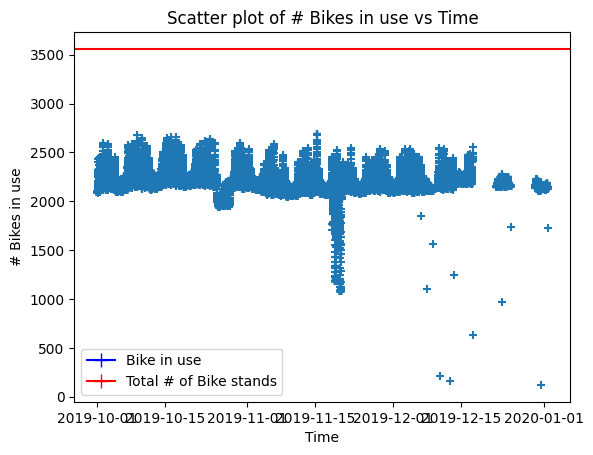

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
time = data['TIME'] 
bikesInUse = data['IN USE']
#Display data of IN USE vs Time 
plt.scatter(time, bikesInUse, marker="+")
plt.axhline(y=TOTAL_BIKE_STANDS, c='r')
plt.xlabel("Time")
plt.ylabel("# Bikes in use")
plt.title("Scatter plot of # Bikes in use vs Time")
plt.savefig("graphs/scatter2019.png") 
legend = [mlines.Line2D([], [], color='blue', marker='+', markersize=10, label='Bike in use'),
          mlines.Line2D([], [], color='red', marker='+', markersize=10, label='Total # of Bike stands')]
plt.legend(handles=legend)
plt.show()
plt.clf() 



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

#Feature engineering - polynomnial features for time
poly = PolynomialFeatures(2)

#Standardising 
weatherValues = np.column_stack((dataset['RAIN'], dataset['MAX_TEMP'], dataset['MIN_TEMP']))
scaler = StandardScaler().fit(weatherValues)
weatherScaled = StandardScaler().fit_transform(weatherValues)
print("Scaled mean : ", scaler.mean_)
# Sin and cosine to represent cyclic data - i.e month, day, hour, minutes
#Month 
monthAngle = dataset['MONTH']*(2.*np.pi/30)
dataset['MONTH_SIN'] = np.sin(monthAngle)
dataset['MONTH_COS'] = np.cos(monthAngle)
#Day 
dayAngle = np.sin(dataset['DAY']*(2.*np.pi/30))
dataset['DAY_SIN'] = np.sin(dayAngle)
dataset['DAY_COS'] = np.cos(dayAngle)
#Hour 
hourAngle = dataset['HOUR']*(2.*np.pi/30)
dataset['HOUR_SIN'] = np.sin(hourAngle)
dataset['HOUR_COS'] = np.cos(hourAngle)
#Minute 
minuteAngle = dataset['MINUTE']*(2.*np.pi/30)
dataset['MINUTE_SIN'] = np.sin(minuteAngle)
dataset['MINUTE_COS'] = np.cos(minuteAngle)

X = np.column_stack((dataset['YEAR'], dataset['MONTH'], dataset['DAY'], 
                     dataset['HOUR'], dataset['MINUTE'], #These are kept just for the axis, deleted after split
                     weatherScaled,
                     dataset['MONTH_SIN'], dataset['MONTH_COS'],
                     dataset['DAY_SIN'], dataset['DAY_COS'],
                     dataset['HOUR_SIN'], dataset['HOUR_COS'],
                     dataset['MINUTE_SIN'], dataset['MINUTE_COS']))
#X = np.column_stack((dataset['YEAR'], dataset['MONTH'], dataset['DAY'], dataset['HOUR'], dataset['MINUTE'], dataset['MONTH'] ** 2, dataset['HOUR'] ** 2, dataset['HOUR'] ** 3, dataset['MINUTE'] ** 2, dataset['RAIN'] ** 2, dataset['RAIN'], dataset['MAX_TEMP'], dataset['MIN_TEMP']))

y = dataset['IN USE']

# 80% training - 20% test split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
XTestDates = Xtest[:, [0,1,2,3,4]]
Xtrain = np.delete(Xtrain, [0, 1,2,3,4], axis=1) # Delete Month, Day, Hour, Minute as they are now representated as cosine/sin
Xtest = np.delete(Xtest, [0, 1,2,3,4], axis=1)
print(Xtrain)


Scaled mean :  [ 3.55785251 11.26053578  6.37075149]
[[-0.297745    1.1653167   1.23333851 ... -0.10452846 -0.8660254
   0.5       ]
 [-0.60262895 -1.40271893 -1.60791787 ... -0.66913061 -0.8660254
  -0.5       ]
 [-0.60262895 -0.90886593 -0.92457773 ... -0.9781476   0.8660254
   0.5       ]
 ...
 [-0.60262895 -0.44793646 -1.89564004 ... -0.66913061  0.8660254
  -0.5       ]
 [ 2.71721845 -0.67840119  0.04648458 ... -0.80901699 -0.8660254
   0.5       ]
 [ 0.14264292 -0.48085999 -0.31316813 ... -0.66913061  0.
  -1.        ]]


In [7]:
#Neural network setup - Finding best hidden layer size and regularisation
from sklearn.model_selection import cross_val_score 

hidden_size = 5
C = 10

mean_error=[]; std_error=[]
hidden_layer_range = [5,10,25,50,75,100]
for n in hidden_layer_range:
    print("hidden layer size ", n)
    model = MLPRegressor(hidden_layer_sizes=(n), max_iter=1000)
    scores = cross_val_score(model, Xtrain, ytrain)
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
plt.errorbar(hidden_layer_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel("# hidden layer nodes")
plt.ylabel("F1")
plt.show()


hidden layer size  5


/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10

hidden layer size  10


/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10

hidden layer size  25


/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden layer size  50


/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tstephen/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [239]:
model = MLPRegressor(hidden_layer_sizes=(hidden_size), alpha=1.0/C, verbose=True, max_iter=1000).fit(Xtrain, ytrain)
print("Model trained.")
print("Model # features : ", model.n_features_in_)



Iteration 1, loss = 2374832.13551945
Iteration 2, loss = 2371895.00368338
Iteration 3, loss = 2367281.08968875
Iteration 4, loss = 2360908.67064703
Iteration 5, loss = 2352829.32907544
Iteration 6, loss = 2343105.05496380
Iteration 7, loss = 2331837.02547333
Iteration 8, loss = 2319105.29731299
Iteration 9, loss = 2304973.42152297
Iteration 10, loss = 2289520.66213905
Iteration 11, loss = 2272844.52500810
Iteration 12, loss = 2254954.11362860
Iteration 13, loss = 2235949.55674804
Iteration 14, loss = 2215881.54609951
Iteration 15, loss = 2194784.79643368
Iteration 16, loss = 2172733.17428964
Iteration 17, loss = 2149775.47346489
Iteration 18, loss = 2125946.12999467
Iteration 19, loss = 2101270.95614282
Iteration 20, loss = 2075833.65223278
Iteration 21, loss = 2049658.43851866
Iteration 22, loss = 2022798.30680398
Iteration 23, loss = 1995311.60095460
Iteration 24, loss = 1967217.06207961
Iteration 25, loss = 1938566.30680141
Iteration 26, loss = 1909390.39608838
Iteration 27, loss = 

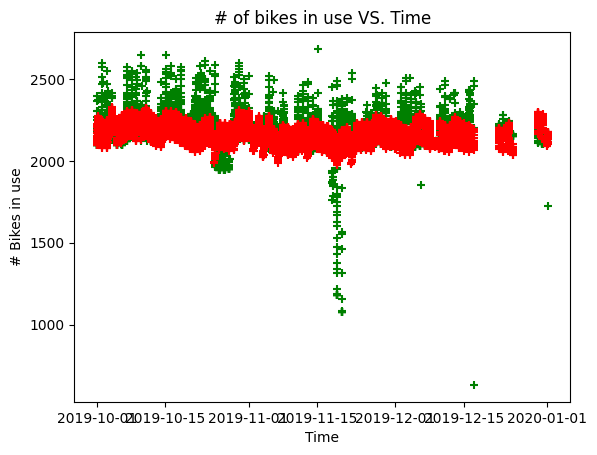

<Figure size 640x480 with 0 Axes>

In [240]:
#Graphs and Metrics of trained neural network 
preds = model.predict(Xtest)
import math 
# date_strings = YEAR-MONTH-DAY HOUR 
def toDateTime(set) : 
    return np.array(list(map(lambda x : str(int(x[0])) + "-" + str(int(x[1])).zfill(2) + "-" + str(int(x[2])).zfill(2) + " " + str(int(math.sqrt(x[3]))).zfill(2) + ":" + str(int(math.sqrt(x[4]))).zfill(2)
                                 , set))) 
                                
date_strings = toDateTime(XTestDates)
Xtest_dates = pd.to_datetime(date_strings, format="%Y-%m-%d %H:%M")

#Graph predictions vs actual for test set 
plt.scatter(Xtest_dates, ytest, c='g', marker="+")
plt.scatter(Xtest_dates, preds, c='r', marker="+")

plt.xlabel("Time")
plt.ylabel("# Bikes in use")
plt.title("# of bikes in use VS. Time")
plt.savefig("graphs/neural2019TestScatter.png")
plt.show() 
plt.clf() 


In [241]:
#Metrics 
from sklearn.metrics import mean_absolute_error, r2_score 
print("Mean absolute error : " + str(mean_absolute_error(ytest, preds)))
print("R2 Score : " + str(r2_score(ytest, preds)))


Mean absolute error : 67.92190534044154
R2 Score : 0.26564964002475855
